# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')


**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
#создаем сводную таблицу и сохраняем ее в переменной data_pivot
data_pivot = data.pivot_table(index='children', values='debt', aggfunc={'count','sum'})
data_pivot = data_pivot.rename(columns={'count':'total', 'sum':'debt_group'}) #для удобства переименовываем столбцы  'sum' и 'count'

ratio = data_pivot['debt_group'] / data_pivot['total'] #находим долю тех, у кого есть долги и сохраняем ее в перменную ratio

data_pivot.insert(loc=2, column='ratio', value=ratio) #добавляем в таблицу data_pivot столбец 'ratio', в котором будут отображены значения переменной ratio
data_pivot #выводим полученную таблицу


,total,debt_group,ratio
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


In [23]:
##для удобства отсортируем таблицу по столбцу 'ratio' в порядке убывания
data_pivot.sort_values(by='ratio', ascending=False)

,total,debt_group,ratio
children,,,
4,41,4,0.097561
2,2052,194,0.094542
1,4808,444,0.092346
3,330,27,0.081818
0,14091,1063,0.075438
5,9,0,0.000000


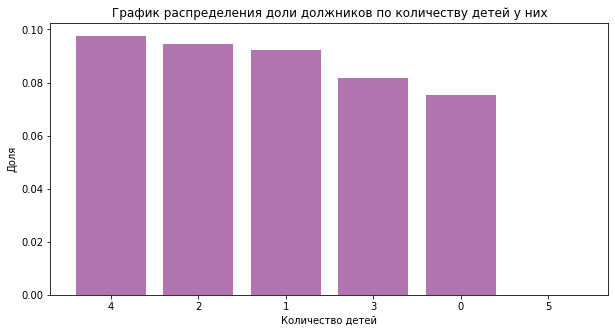

In [24]:
#для наглядности построим график распределения доли должников
#укажем размер графика
plt.rcParams['figure.figsize'] = [10, 5]

#создаем столбец height с получившимися значениями в столбце ratio таблицы data_pivot
height = [0.097561, 0.094542, 0.092346, 0.081818, 0.075438, 0.000000]
#создаем столбец bars с количеством детей у клиентов
bars = ('4', '2', '1', '3', '0', '5')
x_pos = np.arange(len(bars))

plt.bar(x_pos, height, color = (0.5,0.1,0.5,0.6))

#подпишем оси названия график
plt.title('График распределения доли должников по количеству детей у них')
plt.xlabel('Количество детей')
plt.ylabel('Доля')

plt.xticks(x_pos, bars)
plt.show()

**Вывод:** зависимость прослеживается.
Самый низкий процент должников оказался у категории клиентов, у которых есть 5 детей. Однако здесь сложно утверждать, что эти клиенты всегда возвращают кредит в срок, поскольку эта выборка оказалась слишком мала, в нее вошли всего 9 человек.
Поэтому стоит обратить внимание на следующую по меньшинству долю должников (7.54%). Это категория клиентов, у которых нет детей. Стоит обратить внимание, что в нее вошло больше половины от общей выборки. Вполне логично, что семьям или незамужним/ неженатым людям без детей проще распределить свои финансы на свое обеспечение. Если сравнить их с клиентами, у которых 1 или 2 ребенка, то можно говорить о том, что те люди, у которых есть дети реже выплачивают кредит в срок нежели тех, у кого их нет. Важно также отметить, что больше всего должников было обнаружено среди клиентов, у которых 4 детей. При том, что в эту выборку вошло значимо меньше людей (41 человек). Все это подтверждает наличие корреляции между количеством детей у клиента и его способностью выплатить кредит в срок, поскольку чем больше у человека детей, тем сложнее ему обеспечивать себя и свою семью.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
#создаем сводную таблицу и сохраняем ее в переменной data_pivot
data_pivot = data.pivot_table(index='family_status', values='debt', aggfunc={'count','sum'})
data_pivot = data_pivot.rename(columns={'count': 'total', 'sum':'debt_group'}) #для удобства переименовываем столбцы  'sum' и 'count'

ratio = data_pivot['debt_group'] / data_pivot['total'] #находим долю тех, у кого есть долги и сохраняем ее в переменную ratio

data_pivot.insert(loc=2, column='ratio', value=ratio) #добавляем в таблицу data_pivot столбец 'ratio', в котором будут отображены значения переменной ratio
data_pivot #выводим полученную таблицу

,total,debt_group,ratio
family_status,,,
Не женат / не замужем,2796,273,0.097639
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606


In [26]:
#для удобства отсортируем таблицу по столбцу 'ratio' в порядке убывания
data_pivot.sort_values(by='ratio', ascending=False)


,total,debt_group,ratio
family_status,,,
Не женат / не замужем,2796,273,0.097639
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246


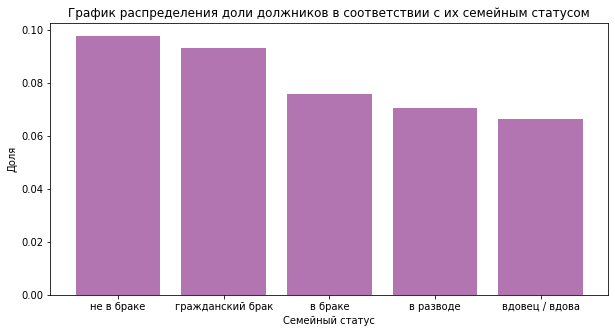

In [27]:
#для наглядности построим график распределения доли должников
#укажем размер графика
plt.rcParams['figure.figsize'] = [10, 5]

#создаем столбец height с получившимися значениями в столбце ratio таблицы data_pivot
height = [0.097639, 0.093130, 0.075606, 0.070648, 0.066246]
#создаем столбец bars с семейными статусами клиентов
bars = ('не в браке', 'гражданский брак', 'в браке', 'в разводе', 'вдовец / вдова')
x_pos = np.arange(len(bars))

plt.bar(x_pos, height, color = (0.5,0.1,0.5,0.6))

#подпишем оси названия график
plt.title('График распределения доли должников в соответствии с их семейным статусом')
plt.xlabel('Семейный статус')
plt.ylabel('Доля')

plt.xticks(x_pos, bars)
plt.show()

**Вывод:** зависимость прослеживается.
Из полученного графика видно, что клиенты, которые не состоят в браке реже возвращают кредит в срок, по сравнению с клиентами других семейных статусов. Возможно, это связано с такими причинами, как нестабильный/низкий доход, молодой возраст и т.д. 

Следует отметить, что среди всех клиентов, те из них, чей семейный статус - это "вдовец/ вдова" или "в разводе", с большей вероятностью выплачивают кредит в срок, нежели тех клиентов, что состоят в официальном или же гражданском браке, например. Здесь могли сыграть такие факторы, как получение наследства при смерти одного из супругов, деление имущества при разводе в пользу одного из супругов и пр.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [28]:
#создаем сводную таблицу и сохраняем ее в переменной data_pivot
data_pivot = data.pivot_table(index='total_income_category', values='debt', aggfunc={'count','sum'})
data_pivot = data_pivot.rename(columns={'count': 'total', 'sum':'debt_group'}) #для удобства переименовываем столбцы  'sum' и 'count'

ratio = data_pivot['debt_group'] / data_pivot['total'] #находим долю тех, у кого есть долги и сохраняем ее в переменную ratio

data_pivot.insert(loc=2, column='ratio', value=ratio) #добавляем в таблицу data_pivot столбец 'ratio', в котором будут отображены значения переменной ratio
data_pivot #выводим полученную таблицу

,total,debt_group,ratio
total_income_category,,,
A,25,2,0.080000
B,5014,354,0.070602
C,15921,1353,0.084982
D,349,21,0.060172
E,22,2,0.090909


In [29]:
#для удобства отсортируем таблицу по столбцу 'ratio' в порядке убывания
data_pivot.sort_values(by='ratio', ascending=False)

,total,debt_group,ratio
total_income_category,,,
E,22,2,0.090909
C,15921,1353,0.084982
A,25,2,0.080000
B,5014,354,0.070602
D,349,21,0.060172


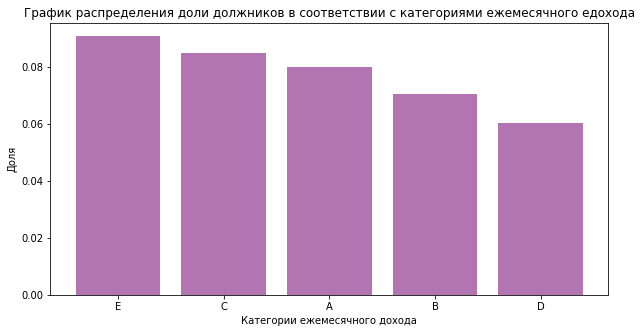

In [30]:
#для наглядности построим график распределения доли должников
#укажем размер графика
plt.rcParams['figure.figsize'] = [10, 5]

#создаем столбец height с получившимися значениями в столбце ratio таблицы data_pivot
height = [0.090909, 0.084982, 0.080000, 0.070602, 0.060172]
#создаем столбец bars с категориями ежемесячного дохода
bars = ('E', 'C', 'A', 'B', 'D')
x_pos = np.arange(len(bars))

plt.bar(x_pos, height, color = (0.5,0.1,0.5,0.6))

#подпишем оси названия график
plt.title('График распределения доли должников в соответствии с категориями ежемесячного едохода')
plt.xlabel('Категории ежемесячного дохода')
plt.ylabel('Доля')

plt.xticks(x_pos, bars)
plt.show()

**Вывод:** зависимость прослеживается. 
Распределение клиентов по категориям неравномерное, поэтому сравним две самые многочисленные категории из всех. Это клиенты с ежемесячным доходом от 200 тыс до 1 млн. (категория B) и клиенты с ежемесячным доходом от 50 тыс. до 200 тыс. (категория C). Как можно увидеть из графика, клиенты с меньшим доходом реже выплачивают кредит вовремя.


#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [31]:
#создаем сводную таблицу и сохраняем ее в переменной data_pivot
data_pivot = data.pivot_table(index='purpose_category', values='debt', aggfunc={'count','sum'})
data_pivot = data_pivot.rename(columns={'count': 'total', 'sum':'debt_group'}) #для удобства переименовываем столбцы  'sum' и 'count'

ratio = data_pivot['debt_group'] / data_pivot['total'] #находим долю тех, у кого есть долги и сохраняем ее в переменную ratio

data_pivot.insert(loc=2, column='ratio', value=ratio) #добавляем в таблицу data_pivot столбец 'ratio', в котором будут отображены значения переменной ratio
data_pivot #выводим полученную таблицу

,total,debt_group,ratio
purpose_category,,,
операции с автомобилем,4279,400,0.093480
операции с недвижимостью,10751,780,0.072551
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118


In [32]:
#для удобства отсортируем таблицу по столбцу 'ratio' в порядке убывания
data_pivot.sort_values(by='ratio', ascending=False)

,total,debt_group,ratio
purpose_category,,,
операции с автомобилем,4279,400,0.093480
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118
операции с недвижимостью,10751,780,0.072551


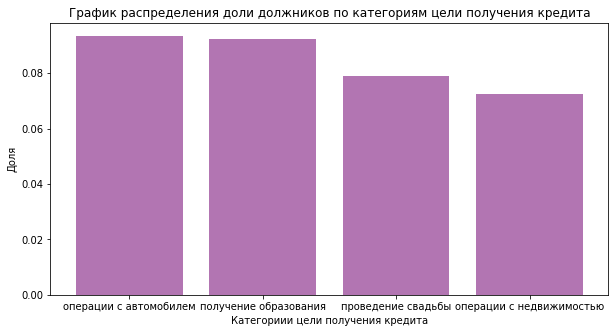

In [33]:
#для наглядности построим график распределения доли должников
#укажем размер графика
plt.rcParams['figure.figsize'] = [10, 5]

#создаем столбец height с получившимися значениями в столбце ratio таблицы data_pivot
height = [0.093480, 0.092528, 0.079118, 0.072551]
#создаем столбец bars с категориями цели получения кредита
bars = ('операции с автомобилем', 'получение образования', 'проведение свадьбы', 'операции с недвижимостью')
x_pos = np.arange(len(bars))

plt.bar(x_pos, height, color = (0.5,0.1,0.5,0.6))

#подпишем оси названия график
plt.title('График распределения доли должников по категориям цели получения кредита')
plt.xlabel('Категориии цели получения кредита')
plt.ylabel('Доля')

plt.xticks(x_pos, bars)
plt.show()

**Вывод:** зависимость наблюдается. Клиенты, которые берут кредит с целью провести какие-либо операции с автомобилем или получить образование реже выплачивают кредит в срок.
В то же время у клиентов, планирующих за счет кредита организовать свадьбу или совершить операции с недвижимостью, вероятность возвратность кредита вовремя значимо больше. Можно предположить, что здесь идет речь о существенно разной сумме кредита.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* в исходных данных пропуски наблюдаются только в столбцах, указывающих на общий трудовой стаж и ежемесячный доход клиентов. Возможные причины могут быть самыми разными. Например, это может выражаться в желании скрыть свою потенциальную неспособность оплатить кредит вовремя. Подобные клиенты хотят создать себе хороший образ в глазах банка и повысить свои шансы на получение кредита. Также возможно, что люди, не указавшие свой месячный доход и общий трудовой стаж, переоценивают свои возможности оплаты кредита в срок и не желают сразу попасть в категорию "неплатежеспособного клиента", даже если они объективно таковы. Помимо человеческого фактора, пропуски здесь могли возникнуть в связи с технологическими ошибками. Возможно, что даже на этапе записи данных или же при считывании/копировании этих данных.


Интересно, что в обоих столбах количество пропусков одинаковое. Было бы интересно посмотреть, с чем это на самом деле связано.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:*  некоторые значения в данных могут сильно разниться по сравнению с остальными. Соотвественно, средние значения могут сильно исказить значения по выборке

### Шаг 4: общий вывод.

В рамках данного исследования, были проанализированы данные csv таблицы, содержащей статистику о платёжеспособности клиентов.

На этапе предобработки были произведены: 
- обработка аномальных значений, 
- заполнение пропущенных значений в столбцах, 
- изменение типов данных и обработка дубликатов. 
- данные были разбиты на категории для дальнейшего удобства обработки информации (а именно те, что содержат информацию о ежемесячном доходе клиентов и о целях получения кредита).

Были подбробно изучены 4 фактора надежности заемщиков: **цель получения кредита, ежемесячный доход, количество детей и семейное положение**.

1. *Цели* клиентов на получение кредита были разделены на следующие категории:
* операции с автомобилем,
* операции с недвижимостью,
* проведение свадьбы,
* получение образования

Как оказалось, клиенты, которые берут кредит с целью провести какие-либо операции с автомобилем или получить образование реже выплачивают кредит в срок. В то же время клиенты, планирующие за счет кредита организовать свадьбу или совершить операции с недвижимостью, чаще остальных выплачивают его в срок. Вероятно, это связано со значимо большей суммой, которую клиенты хотят получить в кредит.

2. По *ежемесячному доходу* клиенты были поделены на 5 категорий:
* 0–30000;
* 30001–50000;
* 50001–200000;
* 200001–1000000;
* 1000001 и выше.

Распределение клиентов по категориям неравномерное, поэтому сравнивались две самые многочисленные категории из всех. Это клиенты с ежемесячным доходом от 200 тыс до 1 млн. (категория B) и клиенты с ежемесячным доходом от 50 тыс. до 200 тыс. (категория C). Как оказалось, клиенты с меньшим доходом реже выплачивают кредит вовремя.

3. Самый низкий процент должников оказался у категории клиентов, у которых есть *5 детей*. Однако здесь сложно утверждать, что эти клиенты всегда возвращают кредит в срок, поскольку эта выборка оказалась слишком мала, в нее вошли всего 9 человек.
Поэтому стоит обратить внимание на следующую по меньшинству долю должников (7.54%). Это категория клиентов, у которых нет детей. Стоит обратить внимание, что в нее вошло больше половины от общей выборки. Вполне логично, что семьям или незамужним/ неженатым людям без детей проще распределить свои финансы на свое обеспечение. Если сравнить их с клиентами, у которых 1 или 2 ребенка, то можно говорить о том, что те люди, у которых есть дети реже выплачивают кредит в срок нежели тех, у кого их нет. Важно также отметить, что больше всего должников было обнаружено среди клиентов, у которых 4 детей. При том, что в эту выборку вошло значимо меньше людей (41 человек). Все это подтверждает наличие корреляции между количеством детей у клиента и его способностью выплатить кредит в срок, поскольку чем больше у человека детей, тем сложнее ему обеспечивать себя и свою семью.

4. Клиенты, которые *не состоят в браке* реже возвращают кредит в срок, по сравнению с клиентами других семейных статусов. Возможно, это связано с такими причинами, как нестабильный/низкий доход, молодой возраст и т.д. Следует отметить, что среди всех клиентов, те из них, чей семейный статус - это "вдовец/ вдова" или "в разводе", с большей вероятностью выплачивают кредит в срок, нежели тех клиентов, что состоят в официальном или же гражданском браке, например. Здесь могли сыграть такие факторы, как получение наследства при смерти одного из супругов, деление имущества при разводе в пользу одного из супругов и пр. 


Таким образом, на основе анализа данных cvs таблицы, портрет идеального заемщика выглядел бы следующих образом:

**Цель:** операции с недвижимостью

**Ежемесячный доход:** 30-50 тыс.

**Наличие детей:** нет

**Семейный статус:** вдовец/ вдова

А портрет рискового заемщика таким:

**Цель:** операции с автомобилем

**Ежемесячный доход:** до 30 тыс.

**Наличие детей:** 4

**Семейный статус:** не женат/ не замужем